In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("uber_updated.csv")

In [18]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
 9   dist_travel_km     199999 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 15.3+ MB


In [20]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'dist_travel_km'],
      dtype='object')

In [21]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)
df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


In [22]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000,199999.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535,20.855350
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997,382.964642
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,1.215222
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2.120992
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,3.875169
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,16409.239135


In [23]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dist_travel_km       1
dtype: int64

In [27]:
df['dropoff_longitude'].fillna(value= df['dropoff_longitude'].median(), inplace = True)
df['dropoff_latitude'].fillna(value= df['dropoff_latitude'].mean(), inplace = True)
df.dropna(inplace=True)

In [29]:
df.isnull().sum().sum()

0

In [30]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [31]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_travel_km                   float64
dtype: object

In [32]:
df['year'] = df.pickup_datetime.dt.year
df['month'] = df.pickup_datetime.dt.month
df['dayofweek'] = df.pickup_datetime.dt.dayofweek
df['hour'] = df.pickup_datetime.dt.hour

In [33]:
df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km,year,month,dayofweek,hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015,5,3,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,2009,7,4,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2009,8,0,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,2009,6,4,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,2014,8,3,17


In [34]:
df = df.drop('pickup_datetime', axis=1)

In [35]:
df.head(5)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km,year,month,dayofweek,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015,5,3,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,2009,7,4,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2009,8,0,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,2009,6,4,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,2014,8,3,17


fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
dist_travel_km          Axes(0.125,0.448049;0.352273x0.0939024)
year                 Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
dayofweek            Axes(0.547727,0.335366;0.352273x0.0939024)
hour                    Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

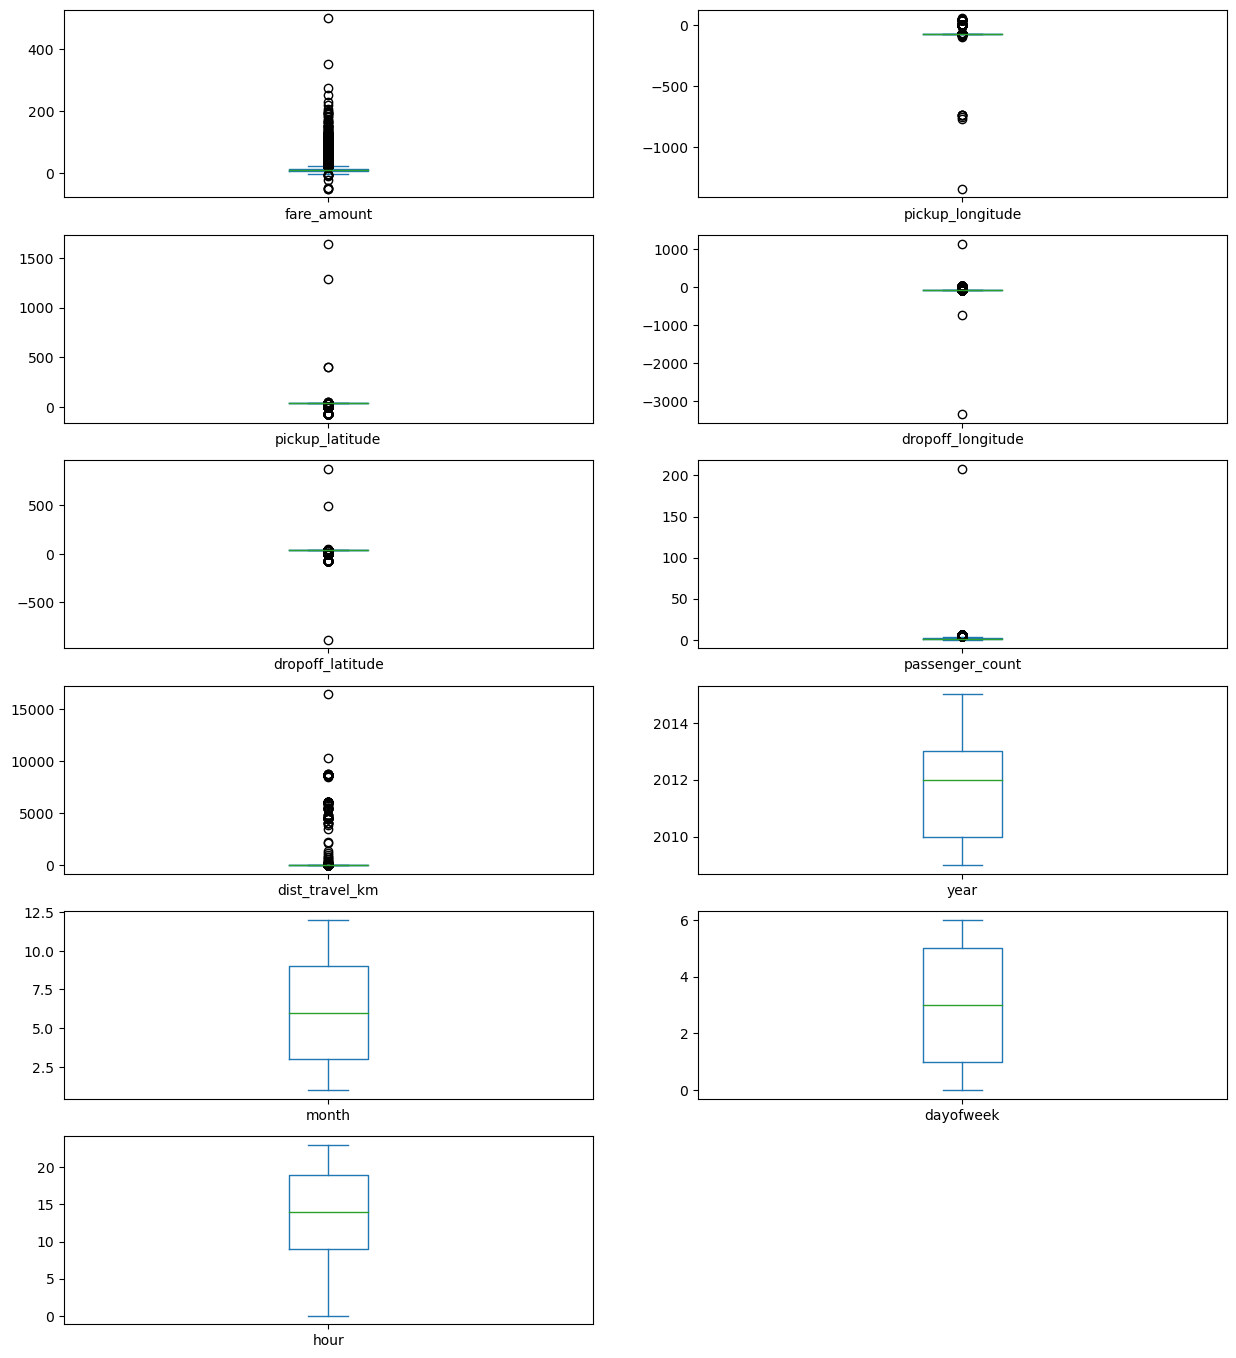

In [36]:
df.plot(kind="box", subplots=True, layout = (7,2), figsize= (15,20))

In [39]:
def remove_outlier(df1, col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    interQuantileRange = Q3 - Q1
    lowerLimit = Q1 - 1.5*interQuantileRange
    upperLimit = Q3 + 1.5*interQuantileRange
    df[col] = np.clip(df1[col], lowerLimit, upperLimit)
    return df1

def treat_all_outliers(df1, col_list):
    for c in col_list:
        df1 = remove_outlier(df, c)
    return df1

df = treat_all_outliers(df, df.iloc[: , 0::]) # all rows and columns.

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
dist_travel_km          Axes(0.125,0.448049;0.352273x0.0939024)
year                 Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
dayofweek            Axes(0.547727,0.335366;0.352273x0.0939024)
hour                    Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

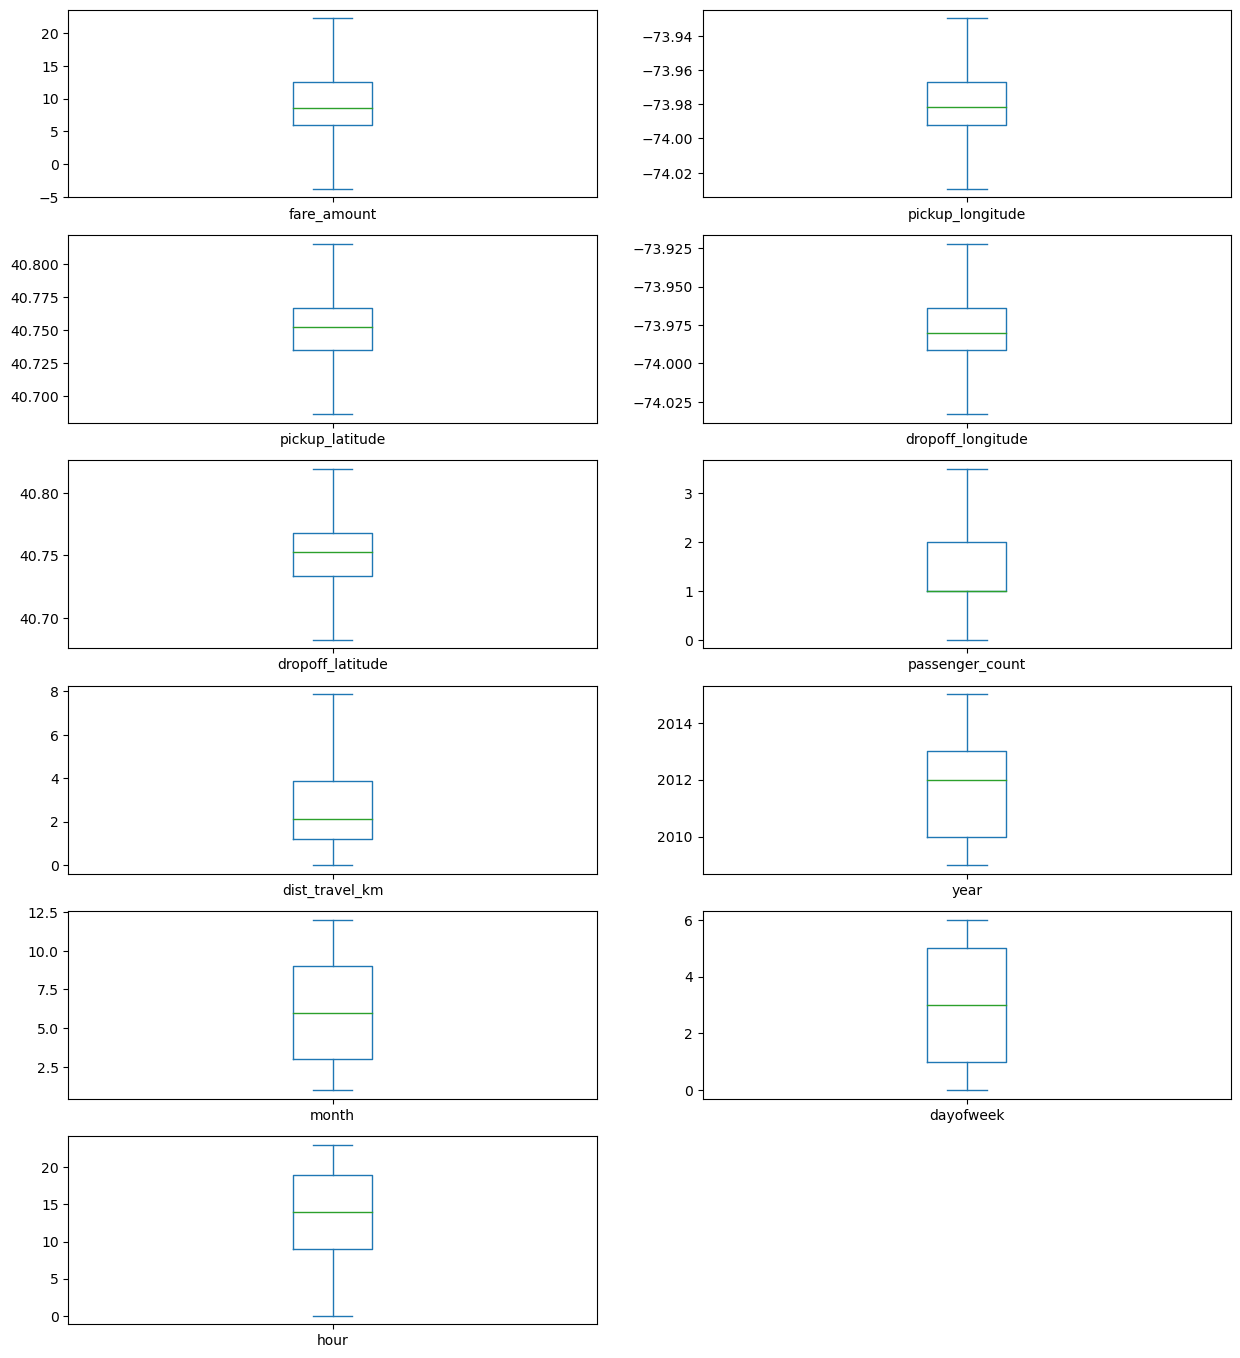

In [40]:
df.plot(kind="box", subplots=True, layout = (7,2), figsize= (15,20))

In [41]:
df= df.loc[(df.dist_travel_km>= 1) | (df.dist_travel_km<= 130)] 
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (199999, 11)


In [42]:
incorrect_coordinates= df.loc[(df.pickup_latitude> 90) |(df.pickup_latitude< -90) | 
                              (df.dropoff_latitude> 90) |(df.dropoff_latitude< -90) | 
                              (df.pickup_longitude> 180) |(df.pickup_longitude< -180) | 
                              (df.dropoff_longitude> 180) |(df.dropoff_longitude< -180) ] 
# print(incorrect_coordinates)
df.drop(incorrect_coordinates, inplace = True, errors='ignore')

In [43]:
df.head(5)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km,year,month,dayofweek,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683323,2015,5,3,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457590,2009,7,4,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036377,2009,8,0,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661683,2009,6,4,8
4,16.0,-73.929788,40.744085,-73.973082,40.761247,3.5,4.475450,2014,8,3,17


In [44]:
corr = df.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km,year,month,dayofweek,hour
fare_amount,1.000000,0.154053,-0.110857,0.218681,-0.125874,0.015798,0.844369,0.141271,0.030815,0.013664,-0.023605
pickup_longitude,0.154053,1.000000,0.259496,0.425622,0.073313,-0.013202,0.098074,0.010193,0.001168,-0.024645,0.011590
pickup_latitude,-0.110857,0.259496,1.000000,0.048887,0.515736,-0.012879,-0.046825,-0.014247,0.001561,-0.042304,0.029691
dropoff_longitude,0.218681,0.425622,0.048887,1.000000,0.245670,-0.009304,0.186533,0.011347,0.002392,-0.003337,-0.046560
dropoff_latitude,-0.125874,0.073313,0.515736,0.245670,1.000000,-0.006329,-0.038873,-0.009595,-0.001191,-0.031932,0.019765
passenger_count,0.015798,-0.013202,-0.012879,-0.009304,-0.006329,1.000000,0.009729,-0.009743,0.010353,0.048542,0.020260
dist_travel_km,0.844369,0.098074,-0.046825,0.186533,-0.038873,0.009729,1.000000,0.024270,0.011626,0.027066,-0.038348
year,0.141271,0.010193,-0.014247,0.011347,-0.009595,-0.009743,0.024270,1.000000,-0.115860,0.006116,0.002162
month,0.030815,0.001168,0.001561,0.002392,-0.001191,0.010353,0.011626,-0.115860,1.000000,-0.008785,-0.003924
dayofweek,0.013664,-0.024645,-0.042304,-0.003337,-0.031932,0.048542,0.027066,0.006116,-0.008785,1.000000,-0.086956


<Axes: >

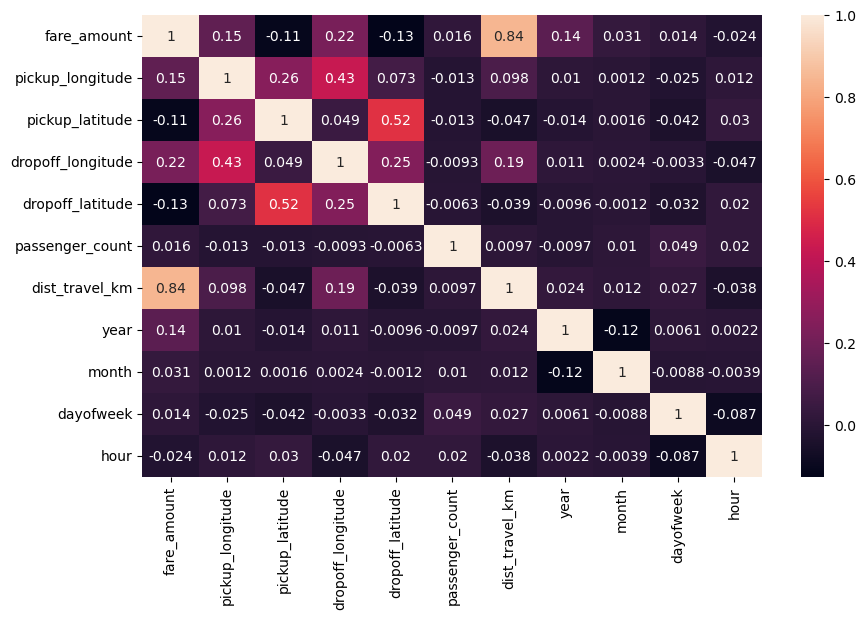

In [45]:
fig,axis= plt.subplots(figsize= (10,6)) 
sns.heatmap(df.corr(),annot= True)

In [46]:
x= df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','month','year','dayofweek','dist_travel_km']]
y = df['fare_amount']

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,train_size=0.8, test_size=0.2, random_state=100)

In [48]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
regression= LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [49]:
prediction = regression.predict(X_test)
print(prediction)

[ 5.46220637 11.18835214 10.63649744 ...  3.49715074  8.60344252
  5.63997798]


In [50]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [59]:
linear_r2 = r2_score(y_test,prediction)
print(linear_r2)

0.7469456788507671


In [60]:
MSE= mean_squared_error(y_test,prediction)
RMSE= np.sqrt(MSE)
RMSE

2.7448864103215187

In [61]:
# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)

In [63]:
ridge_r2 = r2_score(y_test,ridge_pred)
# RMSE_ridge = np.sqrt(mean_squared_error(y_test, ridge_pred))
print(ridge_r2)

0.7469470419259713


In [56]:
# Lasso Regression
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)

In [64]:
lasso_r2 = r2_score(y_test, lasso_pred)
print(lasso_r2)

0.7087342990377103


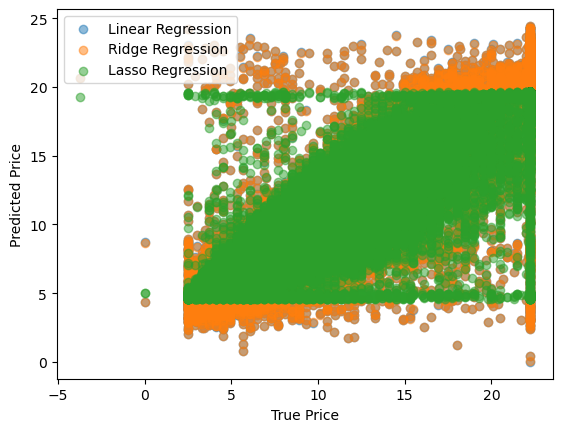

In [65]:
plt.scatter(y_test, prediction, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, ridge_pred, label='Ridge Regression', alpha=0.5)
plt.scatter(y_test, lasso_pred, label='Lasso Regression', alpha=0.5)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

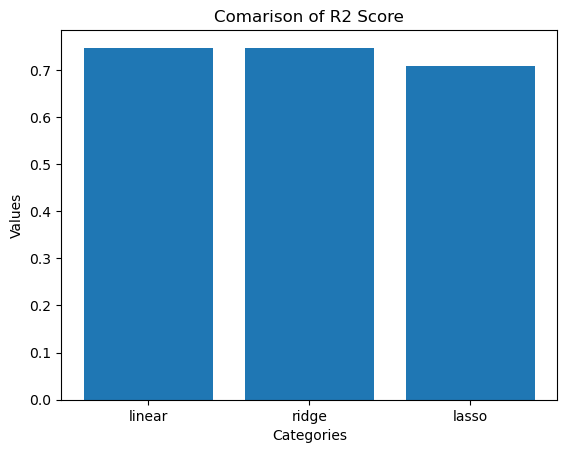

In [76]:
categories = ['linear', 'ridge', 'lasso']
values = [linear_r2, ridge_r2, lasso_r2]

# Create a bar plot
plt.bar(categories, values)
plt.ylim()
# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Comarison of R2 Score')

# Display the plot
plt.show()